In [1]:
from ganrec_dataloader import * 
from utils import *   
from models import *
from skimage.transform import resize
import seaborn as sns

In [107]:
import quantities as pq
energy = 30.8 * pq.keV
lam = wavelength_from_energy(energy)
fresnel_nummber = 0.005 * pq.dimensionless
z = 35.0 * pq.meter
pv = np.sqrt(fresnel_nummber * lam * z) #array(8.39314161e-06) * m
wavenumber = 2 * np.pi / lam
print('pv: ', pv, 'wave_number: ', wavenumber, 'z: ', z, 'fresnel_nummber: ', fresnel_nummber, 'lam: ', lam, 'energy: ', energy)


simulation_attenuation1 = '/beegfs/desy/user/jentscht/for_dawit/iterations_2/groundtruth/fresnel_with_supersampling_double_sphere_30000_eV/ground_truth_projection/ground_truth_projection_attenuation_30000_eV_00061_type_float32_8192x8192.tif'
simulation_phase1 = '/beegfs/desy/user/jentscht/for_dawit/iterations_2/groundtruth/fresnel_with_supersampling_double_sphere_30000_eV/ground_truth_projection/ground_truth_projection_phase_30000_eV_00061_type_float32_8192x8192.tif'

phase_image_orig1 = resize(io.imread(simulation_phase1), (512, 512))
attenuation_image_orig1 = resize(io.imread(simulation_attenuation1), (512, 512))

phase_image1 = phase_image_orig1*wavenumber
attenuation_image1 = attenuation_image_orig1*wavenumber


pv:  2.6541444206983015e-06 m wave_number:  156087748421.9744 1/m z:  35.0 m fresnel_nummber:  0.005 dimensionless lam:  4.0254186319565264e-11 m energy:  30.8 keV


In [115]:
info = {
    'phase': phase_image1,
    'attenuation': attenuation_image1,
    'pv': pv,
    'wavenumber': wavenumber,
    'distance_sample_detector': z.magnitude,
    'fresnel_nummber': fresnel_nummber,
    'lam': lam.magnitude,
    'energy': energy.magnitude,
    'energy_kev': energy.magnitude
}
args = get_all_info(**info)
dataloader = Ganrec_Dataloader(**args)

phase shape (512, 512)
phase shape (512, 512)


phase shape (512, 512)
normalize
gen_loss:  tensor(23.7421, device='cuda:3', grad_fn=<AddBackward0>) dis_loss:  tensor(1.5106, device='cuda:3', grad_fn=<AddBackward0>)
gen_loss:  tensor(13.3385, device='cuda:3', grad_fn=<AddBackward0>) dis_loss:  tensor(1.3866, device='cuda:3', grad_fn=<AddBackward0>)
gen_loss:  tensor(12.6788, device='cuda:3', grad_fn=<AddBackward0>) dis_loss:  tensor(1.3576, device='cuda:3', grad_fn=<AddBackward0>)
gen_loss:  tensor(12.4348, device='cuda:3', grad_fn=<AddBackward0>) dis_loss:  tensor(1.3420, device='cuda:3', grad_fn=<AddBackward0>)
gen_loss:  tensor(12.2520, device='cuda:3', grad_fn=<AddBackward0>) dis_loss:  tensor(1.3365, device='cuda:3', grad_fn=<AddBackward0>)
gen_loss:  tensor(12.0973, device='cuda:3', grad_fn=<AddBackward0>) dis_loss:  tensor(1.3367, device='cuda:3', grad_fn=<AddBackward0>)
gen_loss:  tensor(11.9971, device='cuda:3', grad_fn=<AddBackward0>) dis_loss:  tensor(1.3314, device='cuda:3', grad_fn=<AddBackward0>)
gen_loss:  tensor(11.8

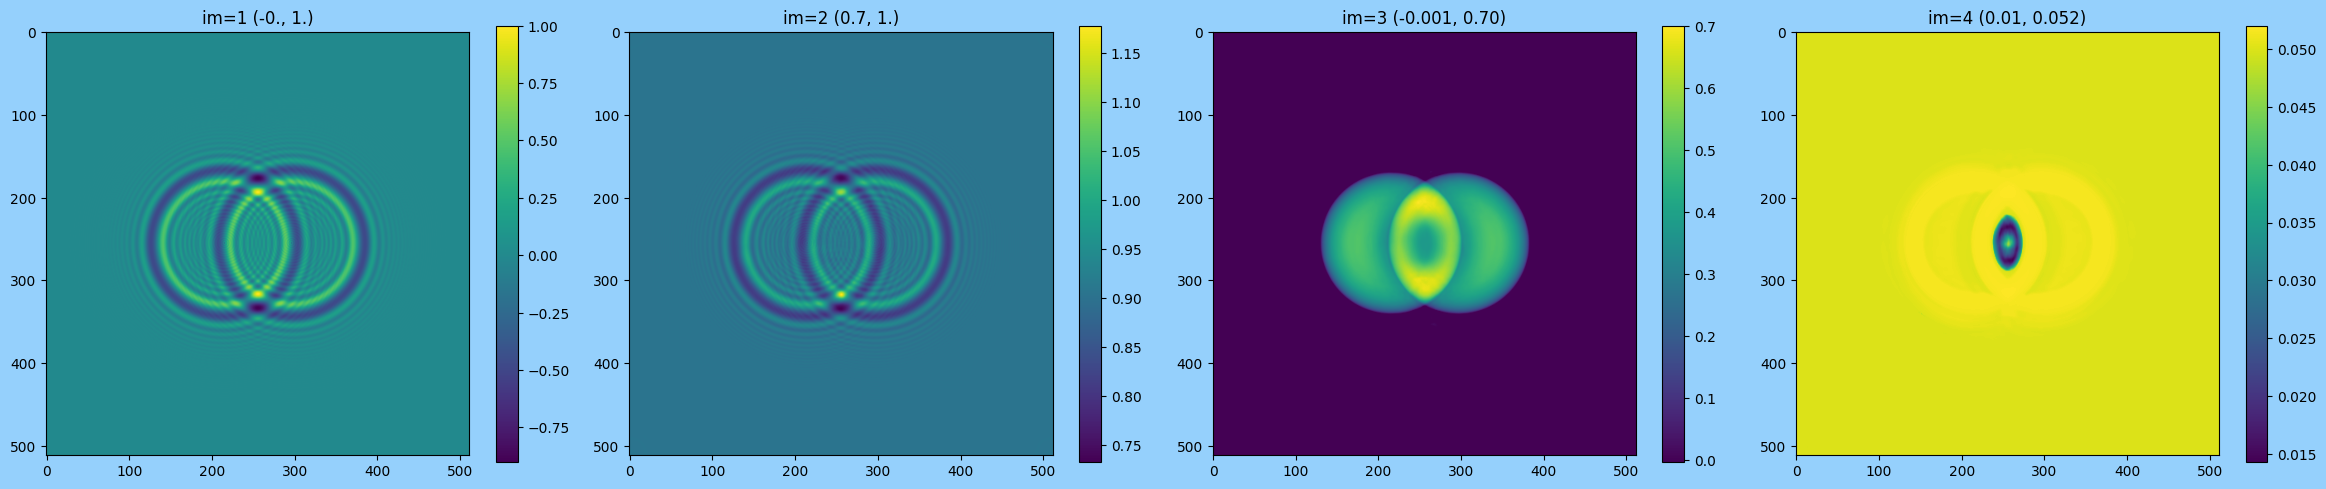

In [117]:
#******************************* TRAINING  ************************************
# we will use constant padding for the training, with abs_ratio = 0.05, iter_num = 700
# we will use the default values for the rest of the arguments
dataloader.update_values(mode = 'reflect', idx = 0, iter_num = 1000, change_all=True, transform_type = 'reshape', transform_factor = 0.7)
model = make_ganrec_model(**dataloader.get_kwargs())
gen_loss_list, dis_loss_list, propagated_intensity_list, phase_list, attenuation_list = model.train(save_model=True, save_model_path='model.pth')
fig = visualize([tensor_to_np(dataloader.transformed_images), propagated_intensity_list[-1], phase_list[-1], attenuation_list[-1]])
# model.live_plot(5) #show a video updating every 'rate' iterations

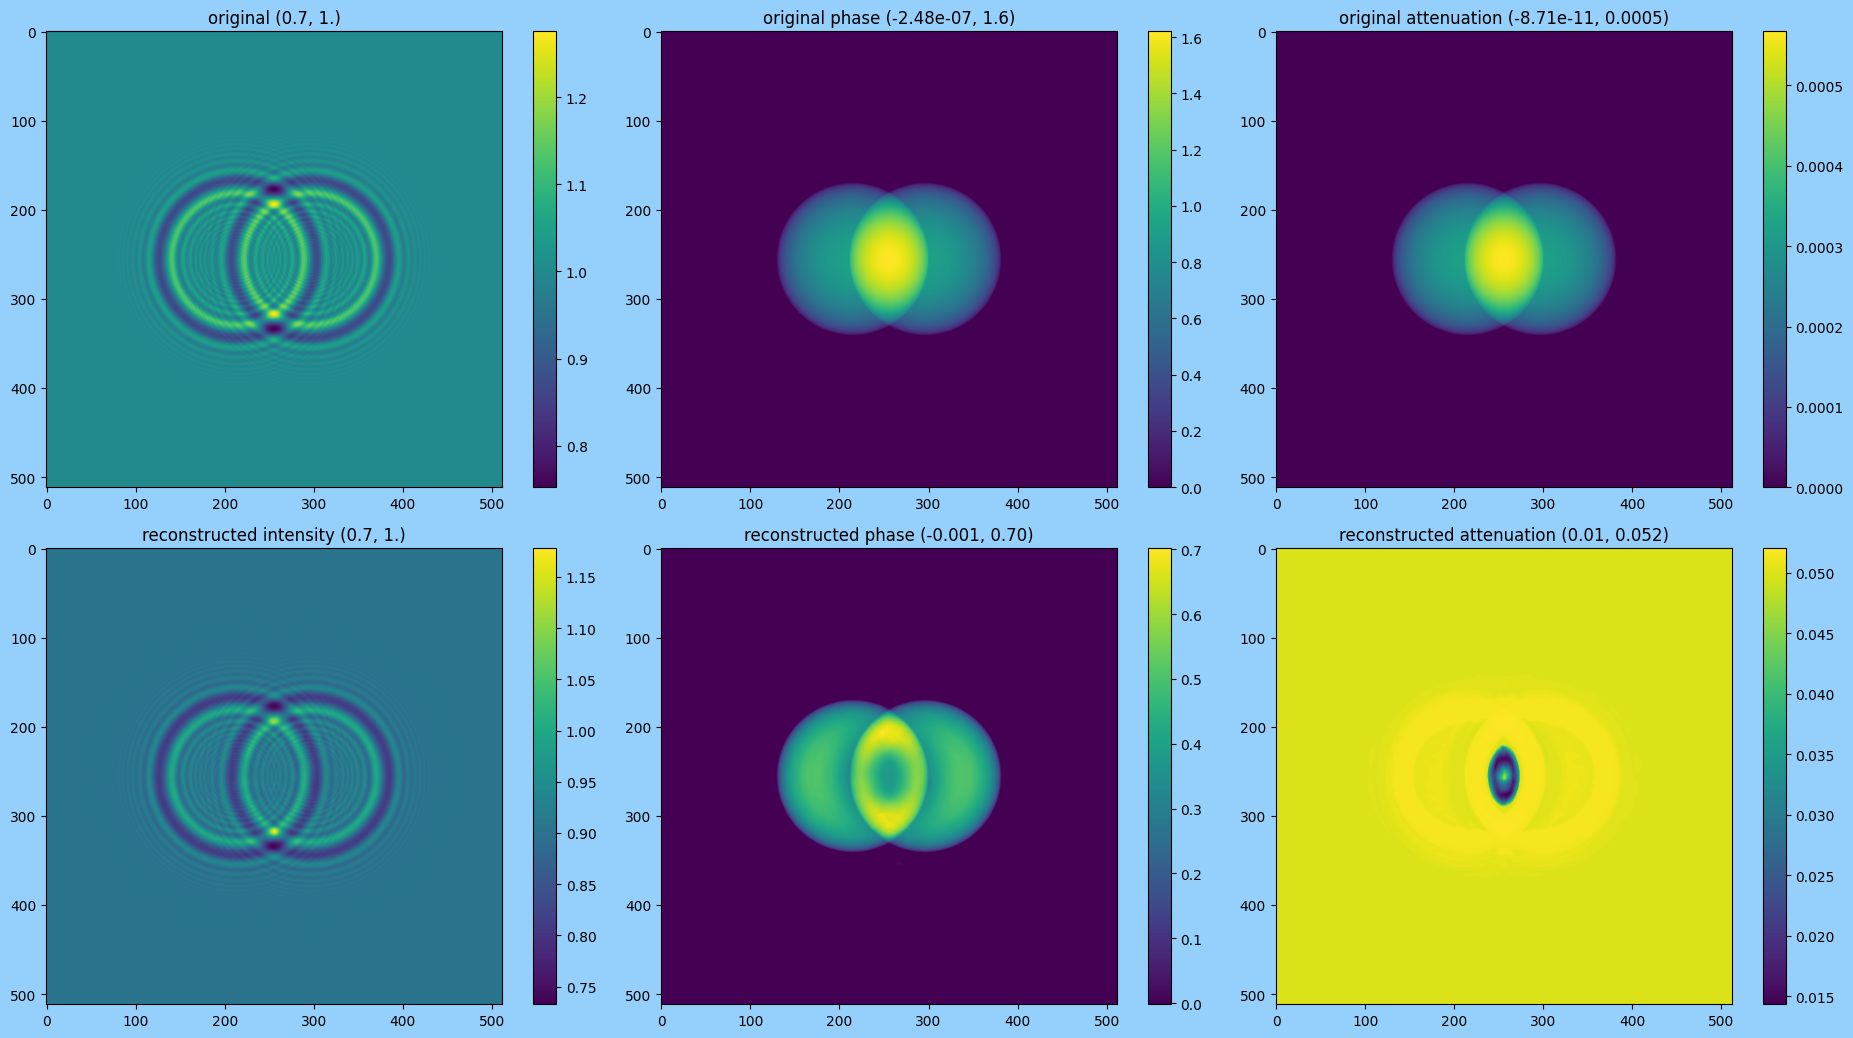

In [121]:
f = visualize([args['image'], args['phase'], args['attenuation'],propagated_intensity_list[-1], phase_list[-1], attenuation_list[-1]], rows=2, cols=3, title=['original', 'original phase', 'original attenuation', 'reconstructed intensity', 'reconstructed phase', 'reconstructed attenuation']) 

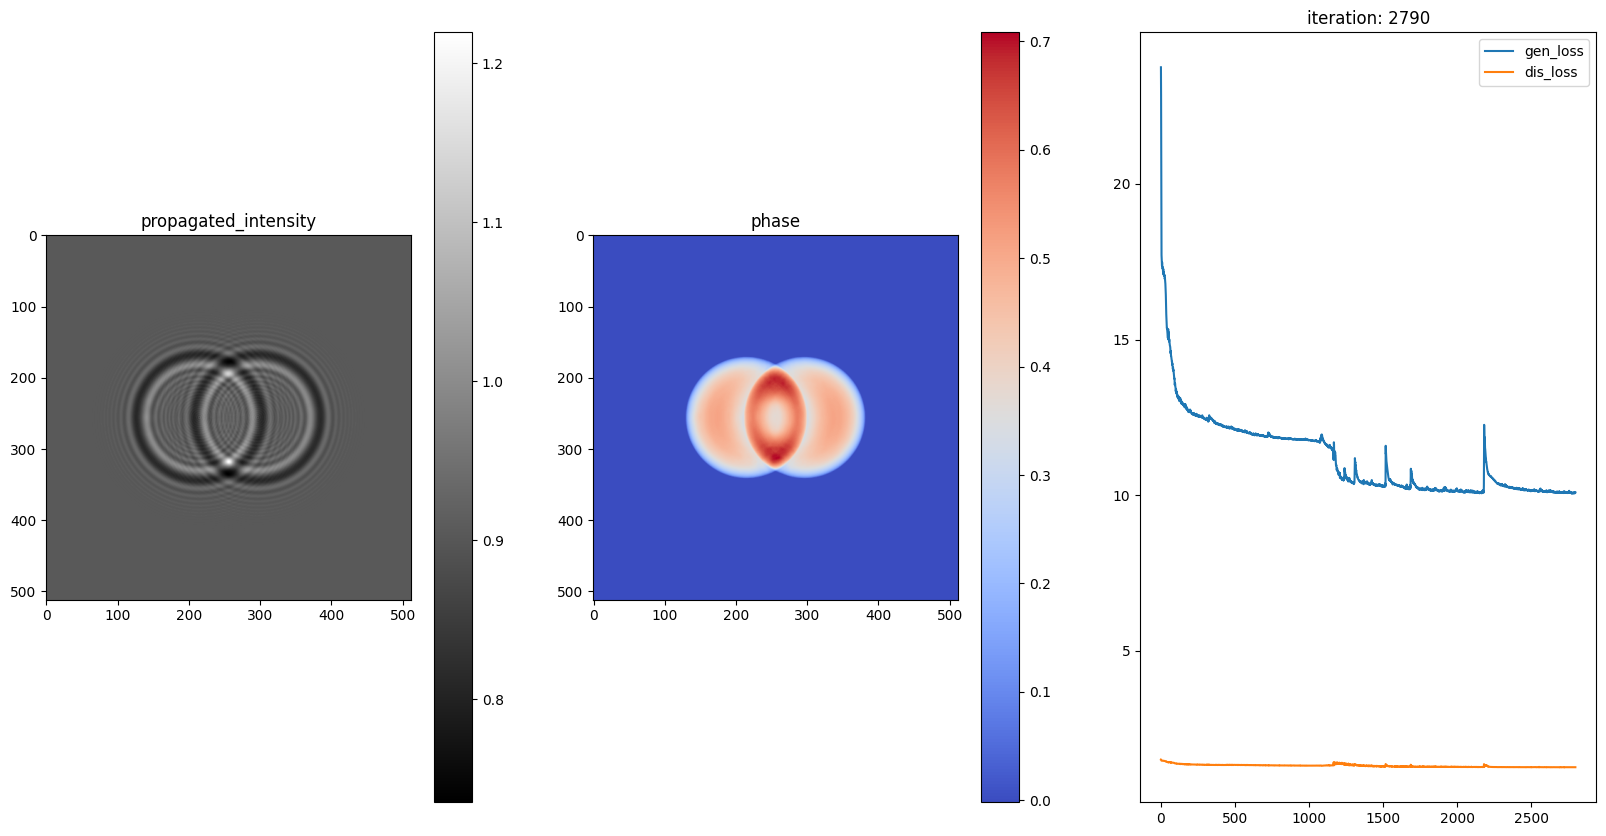

In [122]:
model.live_plot(rate=30)